Th Pyber Company results for the first half of the year shows significant observable trends, especially when we analyze geographic categories such as urban, suburban and rural areas.

Rural Areas have higher fares and greater variability in the size of the fare, while the ride count and the driver count are the lowest of the three categories. 

Suburban areas have higher fares than urban areas and a wide variance in the number of rides per city and generally lower number of drivers than urban areas.

Urban areas have the largest number of drivers and riders, but the price competition seems to drive the fares down.

The Urban markets account for 62% of fares and 68% of total rides, but it has 80% of the drivers.  Additional analysis might be necessary to determine how the added labor costs and lower fares affect the overall profitability of the company.


In [61]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_df= pd.read_csv(city_data_to_load)
ride_df= pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
pyber_df=pd.merge(city_df, ride_df, on="city", how = "left")
# Display the data table for preview
pyber_df

city  driver_count   type                 date   fare  \
0         Richardfort            38  Urban  2018-02-24 08:40:38  13.93   
1         Richardfort            38  Urban  2018-02-13 12:46:07  14.00   
2         Richardfort            38  Urban  2018-02-16 13:52:19  17.92   
3         Richardfort            38  Urban  2018-02-01 20:18:28  10.26   
4         Richardfort            38  Urban  2018-04-17 02:26:37  23.00   
5         Richardfort            38  Urban  2018-04-21 03:44:04   9.54   
6         Richardfort            38  Urban  2018-02-03 00:14:26  29.04   
7         Richardfort            38  Urban  2018-02-08 15:50:12  16.55   
8         Richardfort            38  Urban  2018-04-03 15:07:34  40.77   
9         Richardfort            38  Urban  2018-02-19 14:09:20  27.11   
10        Richardfort            38  Urban  2018-04-22 03:06:56  39.74   
11        Richardfort            38  Urban  2018-01-31 14:51:01  43.92   
12        Richardfort            38  Urban  2018-03-04 22:13:57  14.83   
13        Richardfort            38  Urban  2018-03-28 19:33:00   7.75   
14        Richardfort            38  Urban  2018-02-14 03:27:28  44.11   
15        Richardfort            38  Urban  2018-04-27 11:59:25  30.31   
16        Richardfort            38  Urban  2018-03-03 11:57:24  11.42   
17        Richardfort            38  Urban  2018-01-13 10:08:54  25.81   
18        Richardfort            38  Urban  2018-03-06 12:53:05   8.28   
19        Richardfort            38  Urban  2018-02-05 16:12:04  42.22   
20        Richardfort            38  Urban  2018-04-04 15:04:56  16.35   
21        Richardfort            38  Urban  2018-03-05 16:00:59   4.85   
22        Richardfort            38  Urban  2018-04-14 11:56:28  43.01   
23        Richardfort            38  Urban  2018-01-21 23:20:53  10.91   
24        Richardfort            38  Urban  2018-03-16 23:00:51  21.39   
25        Richardfort            38  Urban  2018-03-22 04:41:04  16.35   
26        Richardfort            38  Urban  2018-01-03 01:06:17   5.32   
27        Richardfort            38  Urban  2018-03-29 15:16:01  37.76   
28       Williamsstad            59  Urban  2018-01-23 17:51:24  19.62   
29       Williamsstad            59  Urban  2018-03-29 21:43:04  35.58   
...               ...           ...    ...                  ...    ...   
2345     Bradshawfurt             7  Rural  2018-03-24 18:53:18  57.51   
2346     Bradshawfurt             7  Rural  2018-03-24 07:34:03  19.89   
2347     Bradshawfurt             7  Rural  2018-02-18 22:21:26  34.32   
2348     Bradshawfurt             7  Rural  2018-04-08 13:46:03  55.19   
2349     Bradshawfurt             7  Rural  2018-04-07 21:12:49  49.70   
2350     Bradshawfurt             7  Rural  2018-02-23 12:00:59  37.05   
2351     Bradshawfurt             7  Rural  2018-04-10 09:47:54  19.07   
2352     Bradshawfurt             7  Rural  2018-01-19 20:21:54  56.78   
2353     Bradshawfurt             7  Rural  2018-01-30 10:55:23  51.39   
2354     New Ryantown             2  Rural  2018-01-27 17:33:41  42.68   
2355     New Ryantown             2  Rural  2018-04-18 19:43:54  42.97   
2356     New Ryantown             2  Rural  2018-02-04 23:54:51  45.70   
2357     New Ryantown             2  Rural  2018-04-30 01:50:44  50.81   
2358     New Ryantown             2  Rural  2018-04-05 21:38:18  50.98   
2359     New Ryantown             2  Rural  2018-05-05 19:29:38  26.53   
2360   Randallchester             9  Rural  2018-04-13 11:13:31  43.22   
2361   Randallchester             9  Rural  2018-02-19 03:52:47  58.55   
2362   Randallchester             9  Rural  2018-02-11 05:42:29  25.78   
2363   Randallchester             9  Rural  2018-03-25 13:36:46  10.37   
2364   Randallchester             9  Rural  2018-04-07 23:42:07  10.79   
2365      Jessicaport             1  Rural  2018-01-01 09:45:36  43.69   
2366      Jessicaport             1  Rural  2018-01-14 07:09:17  18.05   
2367      Jessicaport

## Bubble Plot of Ride Sharing Data

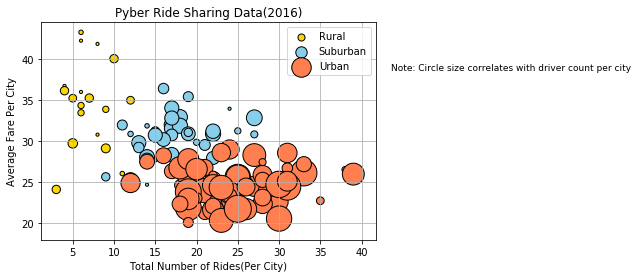

In [87]:
# Obtain the x and y coordinates for each of the three city types

suburban_df= pyber_df[pyber_df['type']=='Suburban']
urban_df= pyber_df[pyber_df['type']=='Urban']
rural_df= pyber_df[pyber_df['type']=='Rural']

urban_df.head()

# Build the scatter plots for each city types
#groupby to separate out each category into dataframes by city type
#urban group

urban_group=urban_df.groupby(['city'])
#Average Fare is the Mean of the Fare
u_avg_fare=urban_group['fare'].mean()
# Total Rides is a count of the Fare
u_ride_total=urban_group['ride_id'].count()

#Driver Total is used to show relative size on Scatter Plot
#so it is multiplied by 10

u_driver_total=urban_group['driver_count'].min()*10

#suburban group
suburban_group=suburban_df.groupby(['city'])

s_avg_fare=suburban_group['fare'].mean()
s_ride_total=suburban_group['ride_id'].count()
s_driver_total=suburban_group['driver_count'].min()*10

#rural group
rural_group=rural_df.groupby(['city'])

r_avg_fare=rural_group['fare'].mean()
r_ride_total=rural_group['ride_id'].count()

r_driver_total=rural_group['driver_count'].min()*10

plt.scatter(r_ride_total,r_avg_fare,facecolors='gold', edgecolors='black',s=r_driver_total)
plt.scatter(s_ride_total,s_avg_fare,facecolors='skyblue', edgecolors='black',s=s_driver_total)
plt.scatter(u_ride_total,u_avg_fare,facecolors='coral', edgecolors='black',s=u_driver_total)

# Incorporate the other graph properties
plt.grid()
plt.title('Pyber Ride Sharing Data(2016)')
plt.xlabel('Total Number of Rides(Per City)')
plt.ylabel('Average Fare Per City', rotation=90)


# Create a legend

plt.legend(['Rural','Suburban','Urban']) 

# Incorporate a text label regarding circle size
plt.annotate('Note: Circle size correlates with driver count per city',
              xy=(1.40, .75), xytext=(1, 1),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=9, ha='center', va='center')
# Save Figure
plt.savefig("data/Fare_Ride_per_City.png")

In [88]:
# Show plot
plt.show()

## Total Fares by City Type

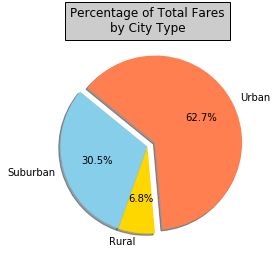

In [89]:
# Calculate Type Percents
# urban_sum
urban_sum=urban_df['fare'].sum()

suburban_sum=suburban_df['fare'].sum()
rural_sum=rural_df['fare'].sum()
total_sum=pyber_df['fare'].sum()
urban_per=urban_sum/total_sum*100
suburban_per=suburban_sum/total_sum*100
rural_per=rural_sum/total_sum*100

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_per,suburban_per, rural_per]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

explode = (0.1, 0, 0)

plt.pie(sizes,  labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=275)

plt.title("Percentage of Total Fares\n" + "by City Type", bbox={'facecolor':'0.8', 'pad':5})


# Save Figure
plt.savefig("data/Percentage_of_Total_Fares_by_City.png")

In [90]:
# Show Figure
plt.show()

## Total Rides by City Type

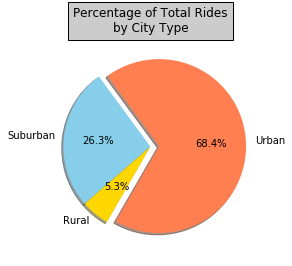

In [91]:
# Calculate Ride Percents
# Calculate Type Percents



urban_ride=urban_df['ride_id'].count()

suburban_ride=suburban_df['ride_id'].count()
rural_ride = rural_df['ride_id'].count()
total_ride=pyber_df['ride_id'].count()
urban_per_ride=urban_ride/total_sum*100
suburban_per_ride=suburban_ride/total_sum*100
rural_per_ride=rural_ride/total_sum*100

# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_per_ride,suburban_per_ride, rural_per_ride]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

explode = (0.1, 0, 0)


plt.pie(sizes,  labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)

plt.title("Percentage of Total Rides\n" + "by City Type", bbox={'facecolor':'0.8', 'pad':5})


# Save Figure
plt.savefig("data/Percentage_of_Total_Rides_by_City.png")



In [92]:
# Show Figure
plt.show()

## Total Drivers by City Type

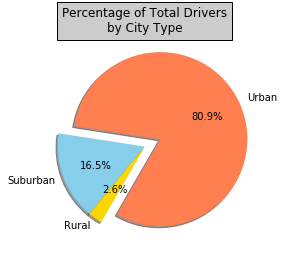

In [93]:
#recalculating total drivers
r_driver_total_true=rural_group['driver_count'].min()
s_driver_total_true=suburban_group['driver_count'].min()
u_driver_total_true=urban_group['driver_count'].min()



rural_total_drivers = r_driver_total_true.sum()
suburban_total_drivers = s_driver_total_true.sum()
urban_total_drivers = u_driver_total_true.sum()
total_drivers =  rural_total_drivers + suburban_total_drivers + urban_total_drivers


urban_per_drivers=urban_total_drivers/total_drivers*100
suburban_per_drivers=suburban_total_drivers/total_drivers*100
rural_per_drivers=rural_total_drivers/total_drivers*100


# Build Pie Chart

# Labels for the sections of our pie chart
labels = ["Urban", "Suburban", "Rural"]

# The values of each section of the pie chart
sizes = [urban_total_drivers,suburban_total_drivers, rural_total_drivers]

# The colors of each section of the pie chart
colors = ["coral", "skyblue", "gold"]

explode = (0.2, 0, 0)


plt.pie(sizes,  labels=labels, explode=explode, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)

plt.title("Percentage of Total Drivers\n" + "by City Type", bbox={'facecolor':'0.8', 'pad':5})


# Save Figure
plt.savefig("data/Percentage_of_Total_Drivers_by_City.png")



In [94]:
# Show Figure
plt.show()